In [285]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [286]:
X = torch.tensor([i for i in range(-50, 50)]).float()

In [287]:
def randvec(r1, r2, shape):
    return (r1 - r2) * torch.rand(shape) + r2

In [288]:
y = randvec(-500, 500, X.shape) + X + X.pow(2)

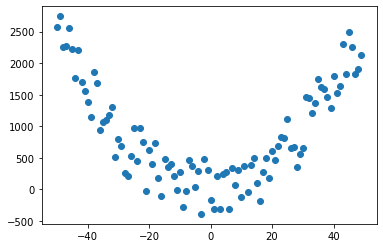

In [289]:
plt.scatter(X, y)

In [290]:
def mse(y_true, y_pred):
    (y_true - y_pred).pow(2).mean()

In [291]:
def create_features(X, degree=2):
    features = []
    for i in range(0, degree):
        if i != 0:
            X_d = X.pow(i)
        else:
            X_d = X
        X_d -= X_d.mean()
        std = X_d.std()
        
        if std != 0:
            X_d /= std
            
        if len(X_d.shape) == 1:
            X_d = X_d.unsqueeze(1)
            
        if i == 0:
            ones_col = torch.ones((X_d.shape[0], 1), dtype=torch.float32)
            X_d = torch.cat([ones_col, X_d], axis=1)
        features.append(X_d)
    return features

In [292]:
features = create_features(X)

In [299]:
def get_weights_col(X):
    #return torch.normal(torch.zeros(X.shape[1]), torch.ones(X.shape[1])).unsqueeze(1)
    return torch.ones(X.shape[1], 1)

def create_weights(features, degree):
    weights = []
    for i in range(degree):
        weights.append(get_weights_col(features[i]))
    return weights

In [300]:
weights = create_weights(features, 2)

In [302]:
def predict(features, weights):
    pred = 0
    for i in range(len(features)):
        pred += features[i].mm(weights[i])
    return pred

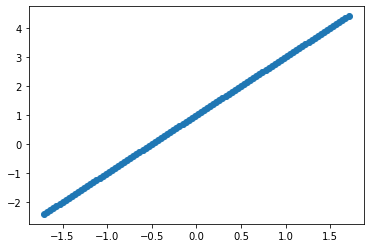

In [303]:
pred = predict(features, weights)
plt.scatter(X, pred)

In [304]:
X

tensor([-1.7062, -1.6718, -1.6373, -1.6028, -1.5683, -1.5339, -1.4994, -1.4649,
        -1.4305, -1.3960, -1.3615, -1.3271, -1.2926, -1.2581, -1.2237, -1.1892,
        -1.1547, -1.1202, -1.0858, -1.0513, -1.0168, -0.9824, -0.9479, -0.9134,
        -0.8790, -0.8445, -0.8100, -0.7756, -0.7411, -0.7066, -0.6721, -0.6377,
        -0.6032, -0.5687, -0.5343, -0.4998, -0.4653, -0.4309, -0.3964, -0.3619,
        -0.3275, -0.2930, -0.2585, -0.2240, -0.1896, -0.1551, -0.1206, -0.0862,
        -0.0517, -0.0172,  0.0172,  0.0517,  0.0862,  0.1206,  0.1551,  0.1896,
         0.2240,  0.2585,  0.2930,  0.3275,  0.3619,  0.3964,  0.4309,  0.4653,
         0.4998,  0.5343,  0.5687,  0.6032,  0.6377,  0.6721,  0.7066,  0.7411,
         0.7756,  0.8100,  0.8445,  0.8790,  0.9134,  0.9479,  0.9824,  1.0168,
         1.0513,  1.0858,  1.1202,  1.1547,  1.1892,  1.2237,  1.2581,  1.2926,
         1.3271,  1.3615,  1.3960,  1.4305,  1.4649,  1.4994,  1.5339,  1.5683,
         1.6028,  1.6373,  1.6718,  1.70